# Import the Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For label encoding of columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Kera Neural Network Package
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasRegressor

# Load the Datasets

In [3]:
df_Train = pd.read_csv('D:/DataSets/House Prices Advanced Regression Techniques/train.csv')
df_Test = pd.read_csv('D:/DataSets/House Prices Advanced Regression Techniques/test.csv')

# Exploratory Data Analysis 

In [4]:
#To find the head of the Data
df_Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Information of the Dataset Datatype
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Information of the Dataset Continuous Values
df_Train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#Columns List
df_Train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
#Shape of the Train and Test Data
print('Shape of Train Data: ', df_Train.shape)
print('Shape of Test Data: ', df_Test.shape)

Shape of Train Data:  (1460, 81)
Shape of Test Data:  (1459, 80)


In [9]:
#Null values in the Train Dataset
print('Null values in Train Data: \n', df_Train.isnull().sum())

Null values in Train Data: 
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [10]:
#Null Values in the Test Dataset
print('Null Values in Test Data: \n', df_Test.isnull().sum())

Null Values in Test Data: 
 Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


# Joining the Train and Test Data 

In [11]:
# We will concat both train and test data set
df_Train['is_train'] = 1
df_Test['is_train'] = 0

#df_Frames = [df_Train,df_Test]
df_Total = pd.concat([df_Train, df_Test])

# Fill Missing Values

In [12]:
#Percentage of the Missing Data

null_value = pd.concat([(df_Total.isnull().sum() /  df_Total.isnull().count())*100], axis=1, keys=['DF_TOTAL'], sort=False)
null_value[null_value.sum(axis = 1) > 0].sort_values(by = ['DF_TOTAL'], ascending = False)

,DF_TOTAL
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageCond,5.447071
GarageYrBlt,5.447071
GarageFinish,5.447071


In [13]:
#Deleting the Columns with more than 40% Null Values

df_Total.drop('PoolQC', axis = 1, inplace = True)
df_Total.drop('MiscFeature', axis = 1, inplace = True)
df_Total.drop('Alley', axis = 1, inplace = True)
df_Total.drop('Fence', axis = 1, inplace = True)
df_Total.drop('FireplaceQu', axis = 1, inplace = True)

In [14]:
#using Forward Fill to fill missing Values

df_Total['LotFrontage'] = df_Total['LotFrontage'].fillna(method="ffill",axis=0)
df_Total['GarageCond'] = df_Total['GarageCond'].fillna(method="ffill",axis=0)
df_Total['GarageYrBlt'] = df_Total['GarageYrBlt'].fillna(method="ffill",axis=0)
df_Total['GarageFinish'] = df_Total['GarageFinish'].fillna(method="ffill",axis=0)
df_Total['GarageQual'] = df_Total['GarageQual'].fillna(method="ffill",axis=0)
df_Total['GarageType'] = df_Total['GarageType'].fillna(method="ffill",axis=0)
df_Total['BsmtExposure'] = df_Total['BsmtExposure'].fillna(method="ffill",axis=0)
df_Total['BsmtCond'] = df_Total['BsmtCond'].fillna(method="ffill",axis=0)
df_Total['BsmtQual'] = df_Total['BsmtQual'].fillna(method="ffill",axis=0)
df_Total['BsmtFinType2'] = df_Total['BsmtFinType2'].fillna(method="ffill",axis=0)
df_Total['BsmtFinType1'] = df_Total['BsmtFinType1'].fillna(method="ffill",axis=0)
df_Total['MasVnrType'] = df_Total['MasVnrType'].fillna(method="ffill",axis=0)
df_Total['MasVnrArea'] = df_Total['MasVnrArea'].fillna(method="ffill",axis=0)
df_Total['MSZoning'] = df_Total['MSZoning'].fillna(method="ffill",axis=0)
df_Total['Functional'] = df_Total['Functional'].fillna(method="ffill",axis=0)
df_Total['BsmtHalfBath'] = df_Total['BsmtHalfBath'].fillna(method="ffill",axis=0)
df_Total['BsmtFullBath'] = df_Total['BsmtFullBath'].fillna(method="ffill",axis=0)
df_Total['Utilities'] = df_Total['Utilities'].fillna(method="ffill",axis=0)
df_Total['KitchenQual'] = df_Total['KitchenQual'].fillna(method="ffill",axis=0)
df_Total['TotalBsmtSF'] = df_Total['TotalBsmtSF'].fillna(method="ffill",axis=0)
df_Total['BsmtUnfSF'] = df_Total['BsmtUnfSF'].fillna(method="ffill",axis=0)
df_Total['GarageCars'] = df_Total['GarageCars'].fillna(method="ffill",axis=0)
df_Total['GarageArea'] = df_Total['GarageArea'].fillna(method="ffill",axis=0)
df_Total['BsmtFinSF2'] = df_Total['BsmtFinSF2'].fillna(method="ffill",axis=0)
df_Total['BsmtFinSF1'] = df_Total['BsmtFinSF1'].fillna(method="ffill",axis=0)
df_Total['Exterior2nd'] = df_Total['Exterior2nd'].fillna(method="ffill",axis=0)
df_Total['Exterior1st'] = df_Total['Exterior1st'].fillna(method="ffill",axis=0)
df_Total['SaleType'] = df_Total['SaleType'].fillna(method="ffill",axis=0)
df_Total['Electrical'] = df_Total['Electrical'].fillna(method="ffill",axis=0)

In [15]:
#Percentage of the Missing Data

null_value = pd.concat([(df_Total.isnull().sum() /  df_Total.isnull().count())*100], axis=1, keys=['DF_TOTAL'], sort=False)
null_value[null_value.sum(axis = 1) > 0].sort_values(by = ['DF_TOTAL'], ascending = False)

,DF_TOTAL
SalePrice,49.982871


# Encoding Of Columns

In [16]:
df_Total = pd.get_dummies(df_Total, columns=["MSZoning"])
df_Total = pd.get_dummies(df_Total, columns=["LotShape"])
df_Total = pd.get_dummies(df_Total, columns=["LandContour"])
df_Total = pd.get_dummies(df_Total, columns=["LotConfig"])
df_Total = pd.get_dummies(df_Total, columns=["LandSlope"])
df_Total = pd.get_dummies(df_Total, columns=["Neighborhood"])
df_Total = pd.get_dummies(df_Total, columns=["Condition1"])
df_Total = pd.get_dummies(df_Total, columns=["Condition2"])
df_Total = pd.get_dummies(df_Total, columns=["BldgType"])
df_Total = pd.get_dummies(df_Total, columns=["HouseStyle"])
df_Total = pd.get_dummies(df_Total, columns=["RoofStyle"])
df_Total = pd.get_dummies(df_Total, columns=["RoofMatl"])
df_Total = pd.get_dummies(df_Total, columns=["Exterior1st"])
df_Total = pd.get_dummies(df_Total, columns=["Exterior2nd"])
df_Total = pd.get_dummies(df_Total, columns=["MasVnrType"])
df_Total = pd.get_dummies(df_Total, columns=["ExterQual"])
df_Total = pd.get_dummies(df_Total, columns=["ExterCond"])
df_Total = pd.get_dummies(df_Total, columns=["Foundation"])
df_Total = pd.get_dummies(df_Total, columns=["BsmtQual"])
df_Total = pd.get_dummies(df_Total, columns=["BsmtCond"])
df_Total = pd.get_dummies(df_Total, columns=["BsmtExposure"])
df_Total = pd.get_dummies(df_Total, columns=["BsmtFinType1"])
df_Total = pd.get_dummies(df_Total, columns=["BsmtFinType2"])
df_Total = pd.get_dummies(df_Total, columns=["Heating"])
df_Total = pd.get_dummies(df_Total, columns=["HeatingQC"])
df_Total = pd.get_dummies(df_Total, columns=["Electrical"])
df_Total = pd.get_dummies(df_Total, columns=["KitchenQual"])
df_Total = pd.get_dummies(df_Total, columns=["Functional"])
df_Total = pd.get_dummies(df_Total, columns=["GarageType"])
df_Total = pd.get_dummies(df_Total, columns=["GarageFinish"])
df_Total = pd.get_dummies(df_Total, columns=["GarageQual"])
df_Total = pd.get_dummies(df_Total, columns=["GarageCond"])
df_Total = pd.get_dummies(df_Total, columns=["PavedDrive"])
df_Total = pd.get_dummies(df_Total, columns=["SaleType"])
df_Total = pd.get_dummies(df_Total, columns=["SaleCondition"])

df_Total['Street'] = le.fit_transform(df_Total['Street'])
df_Total['Utilities'] = le.fit_transform(df_Total['Utilities'])
df_Total['CentralAir'] = le.fit_transform(df_Total['CentralAir'])

In [17]:
df_Total.shape

(2919, 270)

# Un Merge the Train and Test Data after Feature Engineering 

In [18]:
#Un-Merge code
df_Train_final = df_Total[df_Total['is_train'] == 1]
df_Test_final = df_Total[df_Total['is_train'] == 0]

# Keras NN Model

In [19]:
x = df_Train_final
x = x.drop(['Id'], axis=1)
#x = x.drop(['patientid'], axis=1)
x = x.drop(['is_train'], axis=1)
x = x.drop(['SalePrice'], axis=1)
y = df_Train_final['SalePrice']
x_pred = df_Test_final
x_pred = x_pred.drop(['Id'], axis=1)
#x_pred = x_pred.drop(['patientid'], axis=1)
x_pred = x_pred.drop(['is_train'], axis=1)
x_pred = x_pred.drop(['SalePrice'], axis=1)

In [20]:
x.shape

(1460, 267)

In [21]:
x_pred.shape

(1459, 267)

In [22]:
model = Sequential()

model.add(Dense(128, input_shape=(267,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(loss='mean_squared_error', metrics=['mse'], optimizer='adam')

In [23]:
history = model.fit(x, np.ravel(y), epochs=500, verbose=2)

Epoch 1/500
46/46 - 2s - loss: 36636315648.0000 - mse: 36636315648.0000
Epoch 2/500
46/46 - 0s - loss: 19143415808.0000 - mse: 19143415808.0000
Epoch 3/500
46/46 - 0s - loss: 13844390912.0000 - mse: 13844390912.0000
Epoch 4/500
46/46 - 0s - loss: 11679748096.0000 - mse: 11679748096.0000
Epoch 5/500
46/46 - 0s - loss: 10196445184.0000 - mse: 10196445184.0000
Epoch 6/500
46/46 - 0s - loss: 10006950912.0000 - mse: 10006950912.0000
Epoch 7/500
46/46 - 0s - loss: 9159973888.0000 - mse: 9159973888.0000
Epoch 8/500
46/46 - 0s - loss: 9741852672.0000 - mse: 9741852672.0000
Epoch 9/500
46/46 - 0s - loss: 9043997696.0000 - mse: 9043997696.0000
Epoch 10/500
46/46 - 0s - loss: 8589893632.0000 - mse: 8589893632.0000
Epoch 11/500
46/46 - 0s - loss: 7497024000.0000 - mse: 7497024000.0000
Epoch 12/500
46/46 - 0s - loss: 7770227712.0000 - mse: 7770227712.0000
Epoch 13/500
46/46 - 0s - loss: 7918004736.0000 - mse: 7918004736.0000
Epoch 14/500
46/46 - 0s - loss: 6928058880.0000 - mse: 6928058880.0000
Epo

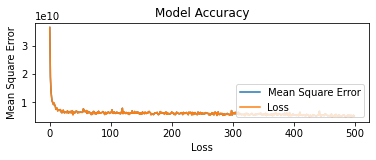

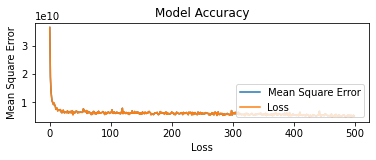

In [25]:
#Plotting the Accuracy Metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['mse'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Mean Square Error')
plt.xlabel('Loss')
plt.legend(['Mean Square Error', 'Loss'], loc='lower right')
fig

In [26]:
y_pred = model.predict_classes(x_pred)

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [27]:
y_pred = y_pred.reshape(1459,)

In [28]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
submission_df = pd.DataFrame({'Id':df_Test['Id'], 'SalePrice':y_pred})
submission_df.to_csv('D:/Sample Submission.csv', index=False)